In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create Data Frame using pandas using read_csv 
df = pd.read_csv("globalterrorismdb_0718dist.csv",error_bad_lines=False, dtype='unicode')


In [2]:
print(df.shape)

(181691, 135)


In [3]:
df.duplicated().sum()   # There are no duplicated values

0

In [4]:
#Total number of missing values in the data set

df.isnull().sum().sum()

13853997

In [5]:
print(df.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [6]:
# Remove un-necessary columns from the data frame
df = df.drop(['approxdate', 'extended', 'resolution','country', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple','attacktype1', 'attacktype2', 'targtype1', 'targsubtype1', 'natlty1', 'natlty1_txt', 'targtype2', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname2', 'guncertain1', 'guncertain2', 'individual', 'nperps', 'nperpcap', 'claimmode', 'claim2', 'claimmode3_txt', 'weaptype1', 'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weapdetail',  'nwoundte', 'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransompaid', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'], axis=1)

In [7]:
# Few columns in the data set have more than 90% missing values those columns were Identified by me using power BI. 
#so lets remove those 18 columns.
df = df.drop(['attacktype3','attacktype3_txt','gsubname2','gname3','gsubname3','guncertain3','claimmode2','claimmode2_txt','claim3','claimmode3','claimmode_txt','compclaim','weaptype4','weaptype4_txt','weapsubtype4','weapsubtype4_txt','ransomamtus','ransompaidus','ransomnote'], axis=1)

In [8]:
df.rename(columns={'eventid': 'event_id','iyear': 'year','imonth': 'month','iday': 'day','nkill': 'killed','country_txt': 'country','region_txt': 'region','attacktype1_txt': 'attack_type','targtype1_txt': 'target_type','weaptype1_txt': 'weapon_type'},inplace=True)


In [9]:
print(df.columns.tolist())

['event_id', 'year', 'month', 'day', 'country', 'region', 'region', 'provstate', 'city', 'latitude', 'longitude', 'location', 'summary', 'success', 'suicide', 'attack_type', 'attacktype2_txt', 'target_type', 'targsubtype1_txt', 'corp1', 'target1', 'targtype2_txt', 'gname', 'gsubname', 'motive', 'claimed', 'weapon_type', 'killed', 'nkillus', 'nkillter', 'nwound', 'nwoundus']


In [10]:
# df = df.astype({'year': 'int64', 'month': 'int64' , 'day':'int64','city':'object','latitude':'float64','longitude':'float64','location':'object','summary':'object','success':'object','attack_type':'object','target_type':'object','gname':'object','motive':'object','weapon_type':'object','killed':'float64','nwound':'float64','nwoundus':'object'}).dtypes


In [11]:
print(df.shape)

(181691, 32)


In [12]:
#  Still there are un-necessary number of colummns present in the data we can find percentage of null values present in each column and remove 50% above null value columns

mis_val_percent = (100 * df.isnull().sum() / len(df)).round(2)   # to show percentage of missing values for each column

perc = 50.0
min_percent =  int(((100-perc)/100)*df.shape[0] + 1)
mod_df = df.dropna( axis=1, thresh=min_percent)

print(mod_df.shape)

(181691, 27)


In [13]:
df.head()


,event_id,year,month,day,country,region,region,provstate,city,latitude,...,gname,gsubname,motive,claimed,weapon_type,killed,nkillus,nkillter,nwound,nwoundus
0,197000000001,1970,7,2,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,...,MANO-D,NaN,NaN,NaN,Unknown,1,NaN,NaN,0,NaN
1,197000000002,1970,0,0,Mexico,1,North America,Federal,Mexico city,19.371887,...,23rd of September Communist League,NaN,NaN,NaN,Unknown,0,NaN,NaN,0,NaN
2,197001000001,1970,1,0,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,...,Unknown,NaN,NaN,NaN,Unknown,1,NaN,NaN,0,NaN
3,197001000002,1970,1,0,Greece,8,Western Europe,Attica,Athens,37.99749,...,Unknown,NaN,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,Japan,4,East Asia,Fukouka,Fukouka,33.580412,...,Unknown,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN


In [14]:
print(df.shape)

(181691, 32)


In [15]:
df['year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1980     2662
1979     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: year, dtype: int64

<AxesSubplot:>

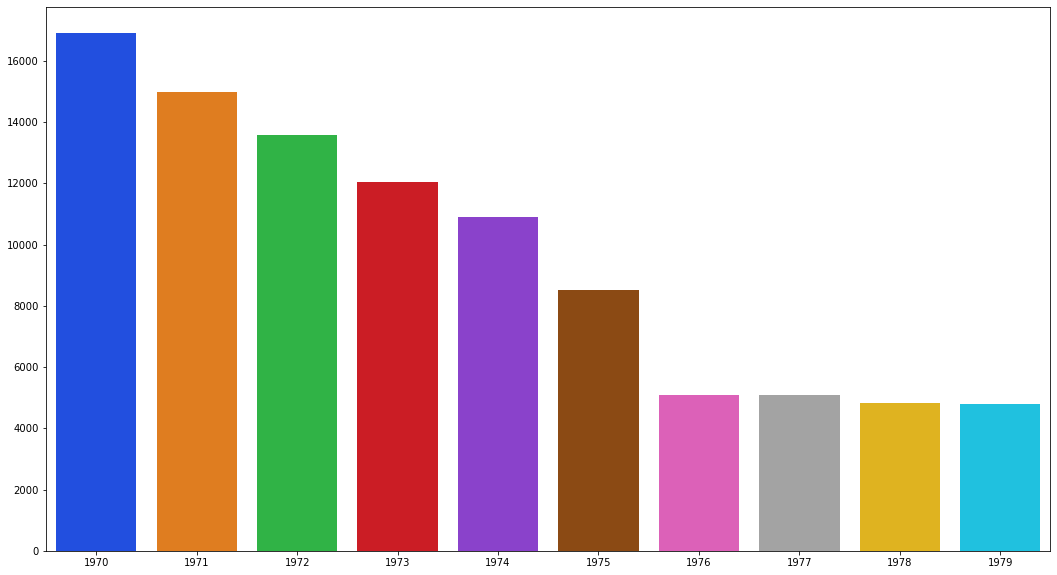

In [16]:
#Terror Attacks happened in top 10 years

year = df['year'].unique()
year = year[:10,]
count_years = df['year'].value_counts(dropna = False)
count_years = count_years[:10,]
plt.figure(figsize=(18,10))
sns.barplot(x = year, y = count_years.values,palette = 'bright')



<AxesSubplot:>

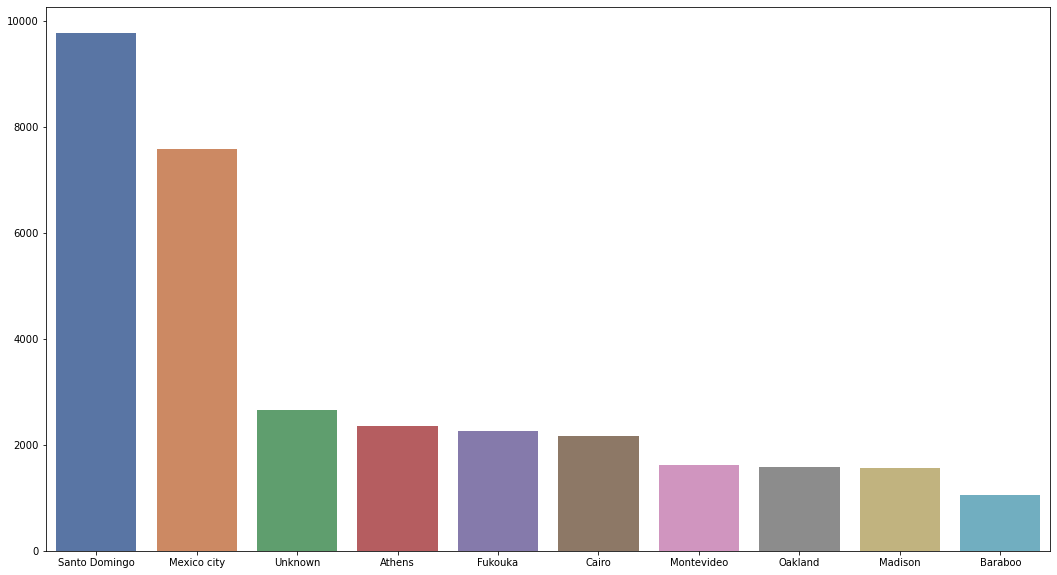

In [17]:
# Top Cities affected by Terror Attacks

city = df['city'].unique()[:10]
city_count = df['city'].value_counts()[:10].values
plt.figure(figsize=(18,10))
sns.barplot(x = city, y = city_count,palette = 'deep')


In [18]:

print(df.columns.tolist())
print(df.shape)

['event_id', 'year', 'month', 'day', 'country', 'region', 'region', 'provstate', 'city', 'latitude', 'longitude', 'location', 'summary', 'success', 'suicide', 'attack_type', 'attacktype2_txt', 'target_type', 'targsubtype1_txt', 'corp1', 'target1', 'targtype2_txt', 'gname', 'gsubname', 'motive', 'claimed', 'weapon_type', 'killed', 'nkillus', 'nkillter', 'nwound', 'nwoundus']
(181691, 32)


In [19]:
data = df['attack_type'].unique()
print(len(data))

# so there are 9 types of attacks happened

9


In [20]:
killed_data = df.loc[:,'killed'].dropna().astype(float)


print('Number of people killed by terror attack:', sum(killed_data))# drop the NaN values

Number of people killed by terror attack: 411868.0


In [21]:
# Number of Killed in Terrorist Attacks by Countries
country_data = df.loc[:,'country'].dropna()

country_kill_count_data = pd.concat([country_data, killed_data], axis=1)
print(country_kill_count_data)



                   country  killed
0       Dominican Republic     1.0
1                   Mexico     0.0
2              Philippines     1.0
3                   Greece     NaN
4                    Japan     NaN
...                    ...     ...
181686             Somalia     1.0
181687               Syria     2.0
181688         Philippines     0.0
181689               India     0.0
181690         Philippines     0.0

[181691 rows x 2 columns]


In [22]:
country_kill_format_data = country_kill_count_data.pivot_table(columns='country', values='killed', aggfunc='sum')
country_kill_format_data

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


<AxesSubplot:xlabel='killed', ylabel='country'>

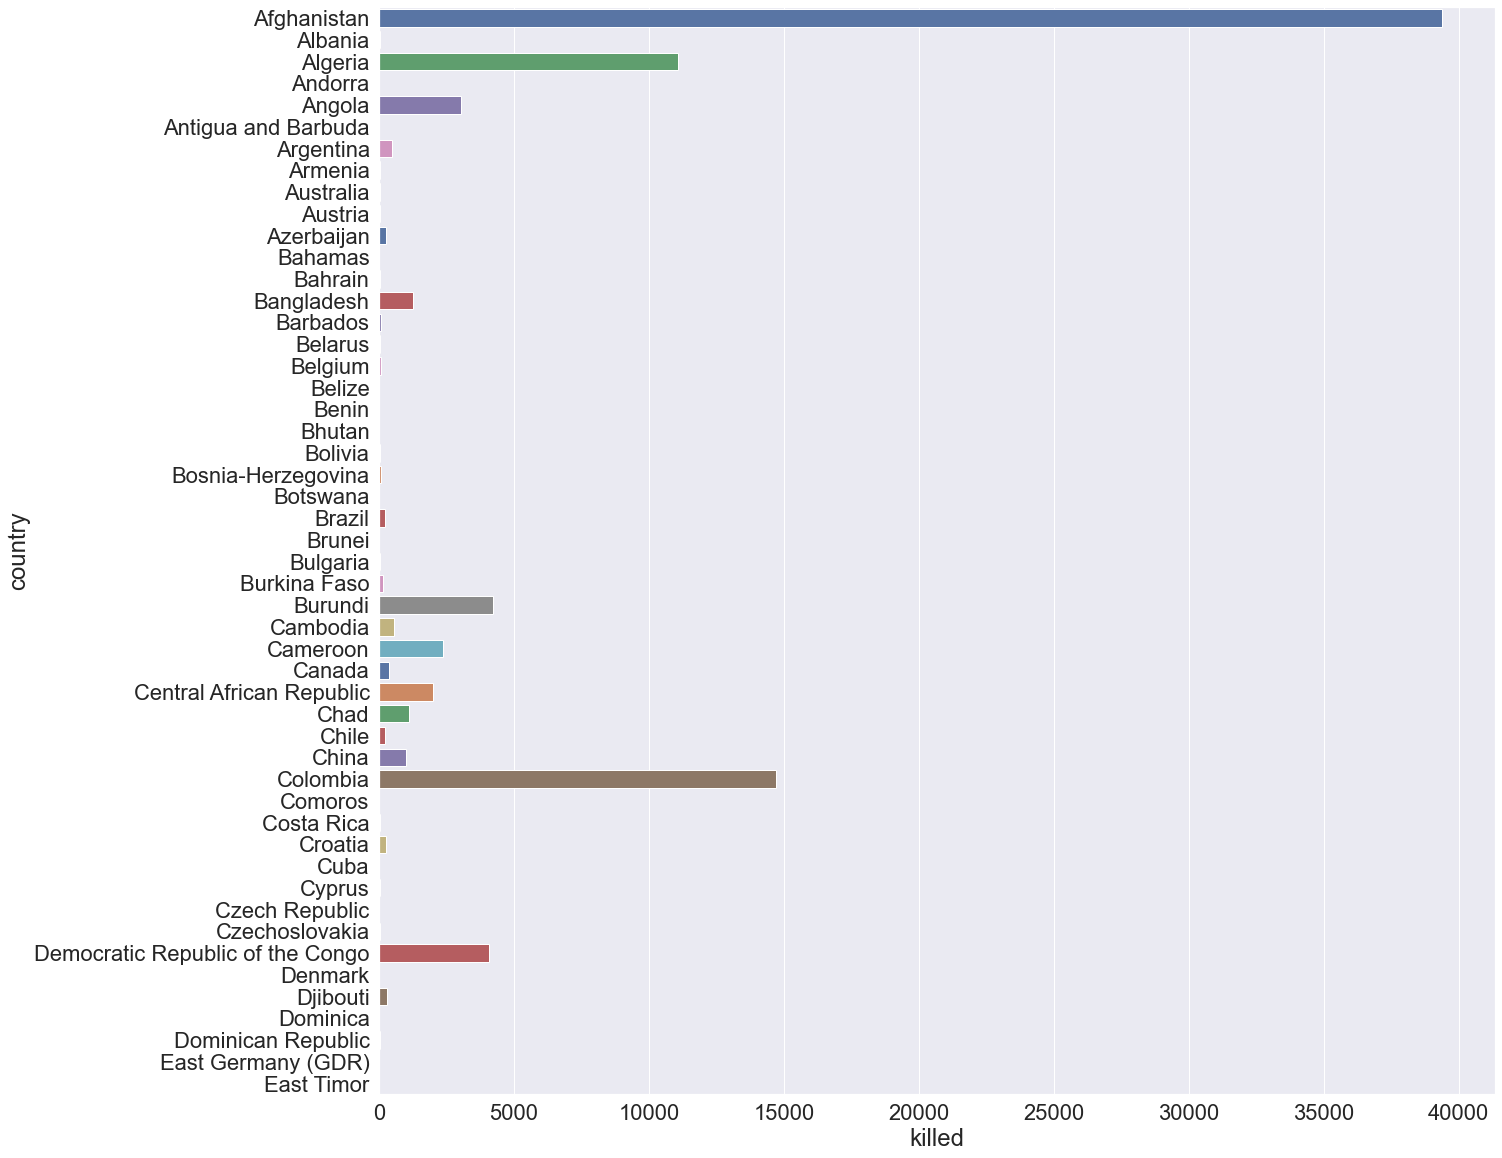

In [23]:
country_names = country_kill_format_data.keys()[:50]
country_wise_killed_count = country_kill_format_data.iloc[0][:50]

#print(country_names)

plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
sns.barplot(x = country_wise_killed_count, y = country_names, palette = 'deep')

<AxesSubplot:xlabel='killed', ylabel='country'>

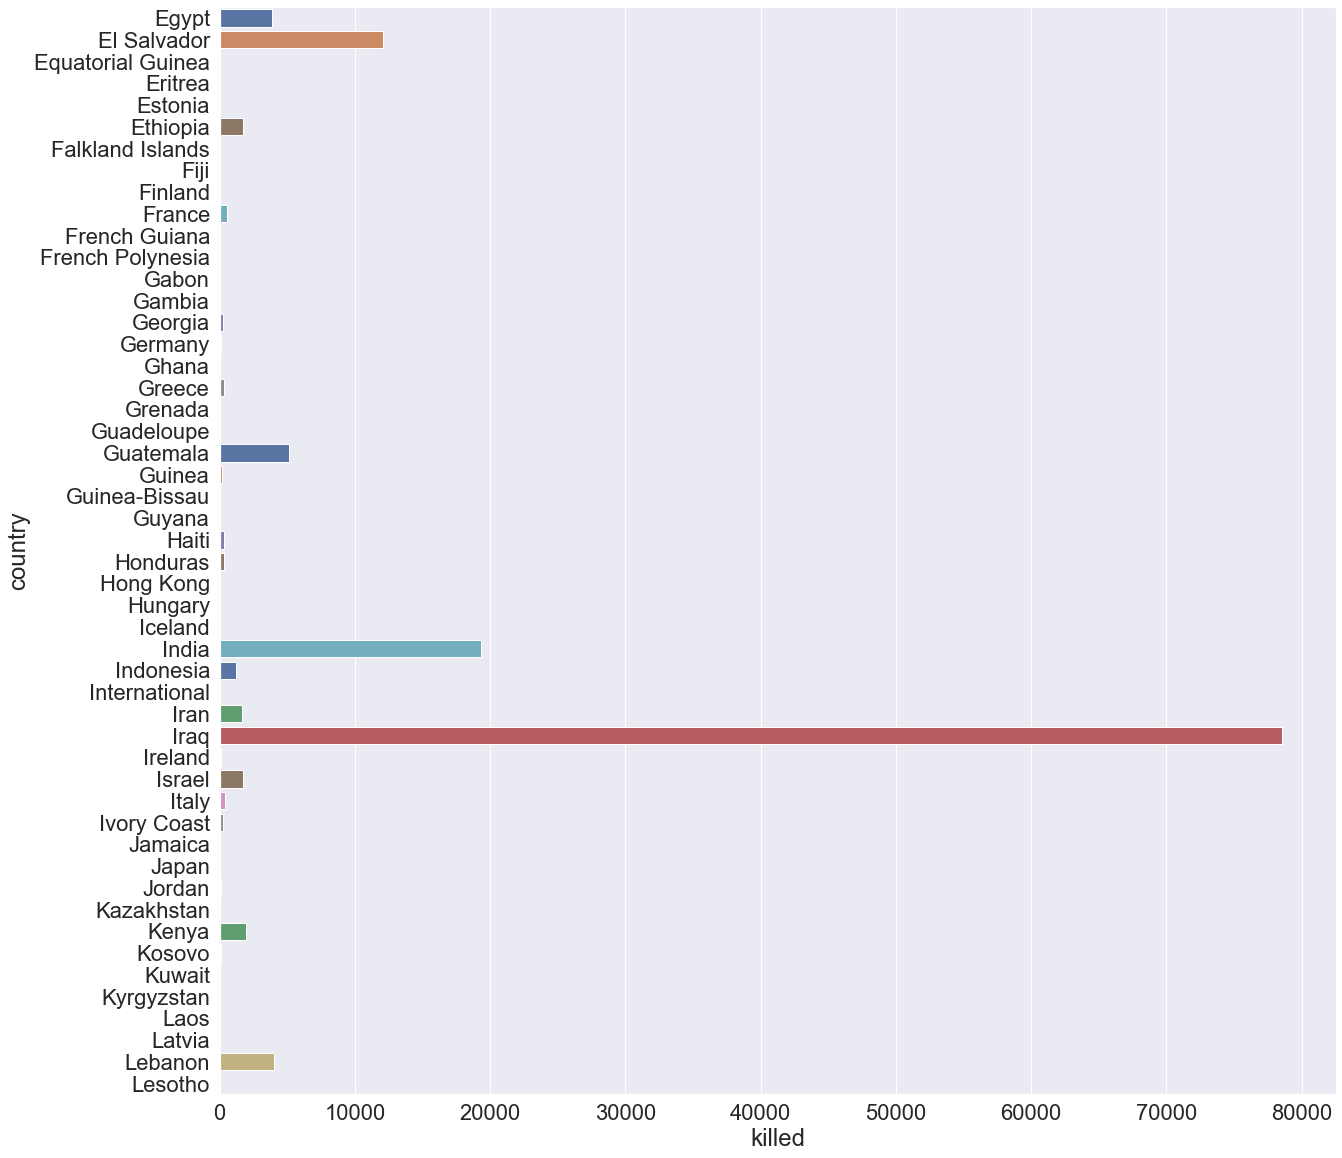

In [24]:
country_names = country_kill_format_data.keys()[51:101]
country_wise_killed_count = country_kill_format_data.iloc[0][51:101]

#print(country_names)

plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
sns.barplot(x = country_wise_killed_count, y = country_names, palette = 'deep')

In [25]:
attack_data = df.loc[:,'attack_type']
# attackData
type_kill_data = pd.concat([attack_data, killed_data], axis=1)
type_kill_data

,attack_type,killed
0,Assassination,1.0
1,Hostage Taking (Kidnapping),0.0
2,Assassination,1.0
3,Bombing/Explosion,NaN
4,Facility/Infrastructure Attack,NaN
...,...,...
181686,Armed Assault,1.0
181687,Bombing/Explosion,2.0
181688,Facility/Infrastructure Attack,0.0
181689,Bombing/Explosion,0.0


<AxesSubplot:xlabel='killed', ylabel='country'>

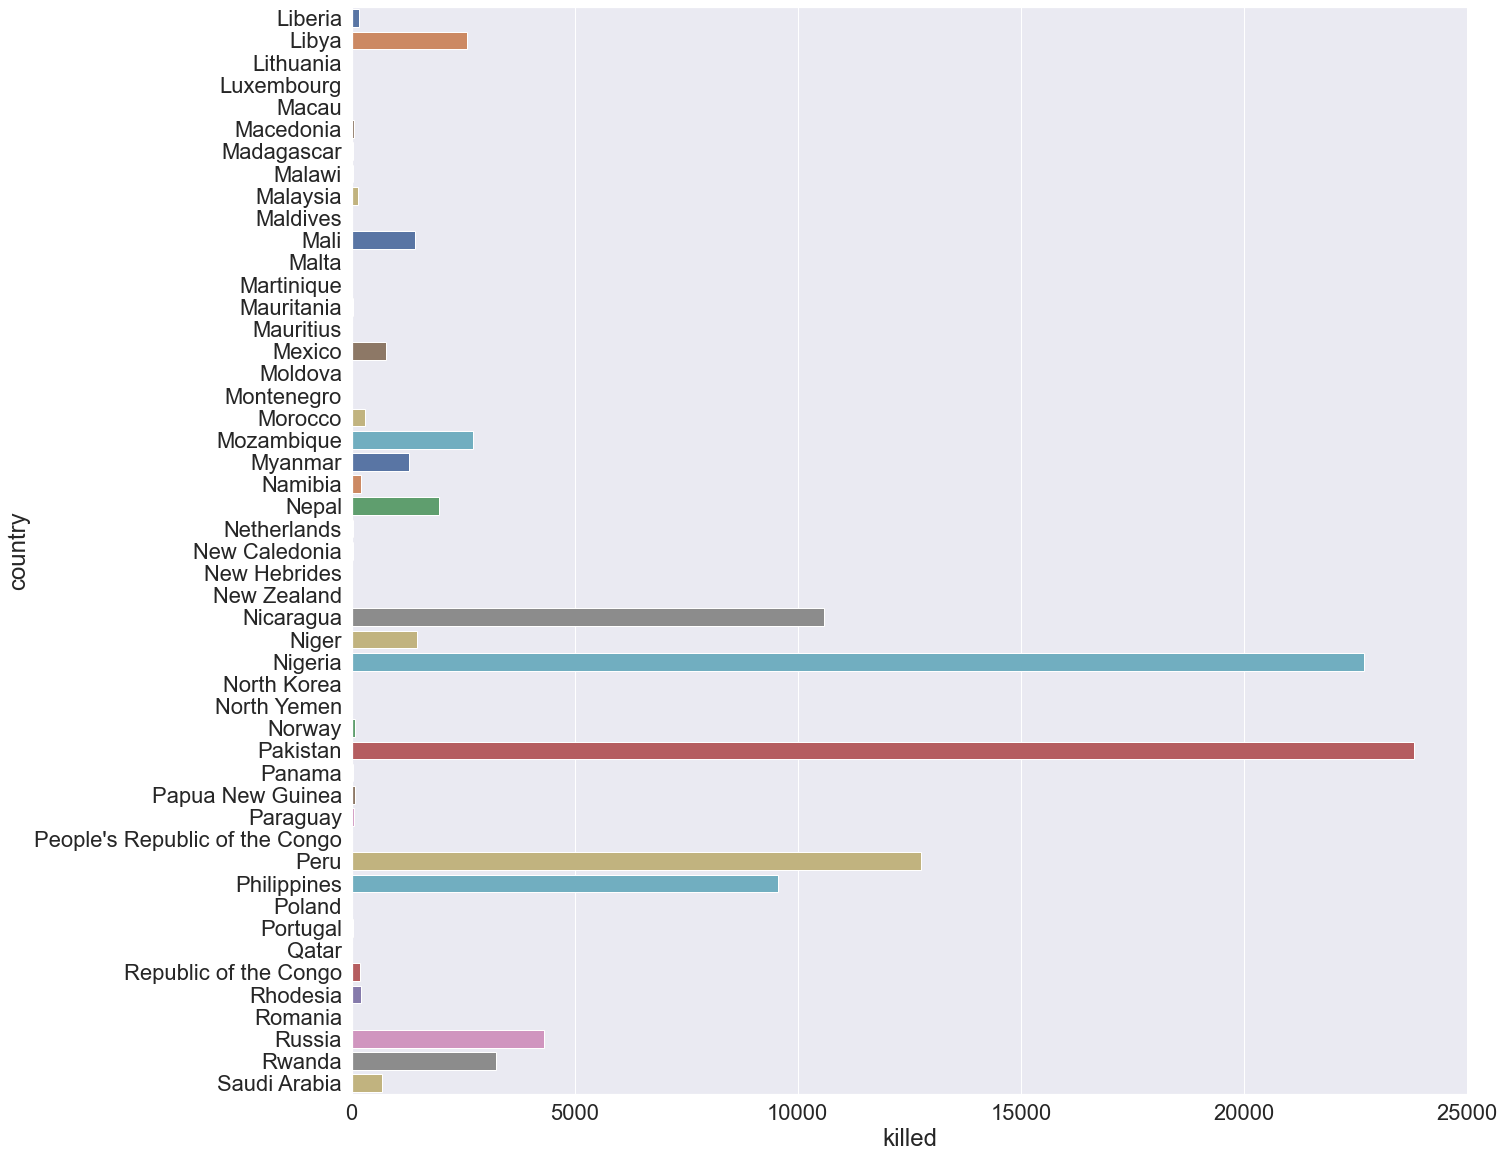

In [26]:
country_names = country_kill_format_data.keys()[101:150]
country_wise_killed_count = country_kill_format_data.iloc[0][101:150]

#print(country_names)

plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
sns.barplot(x = country_wise_killed_count, y = country_names, palette = 'deep')

<AxesSubplot:xlabel='killed', ylabel='country'>

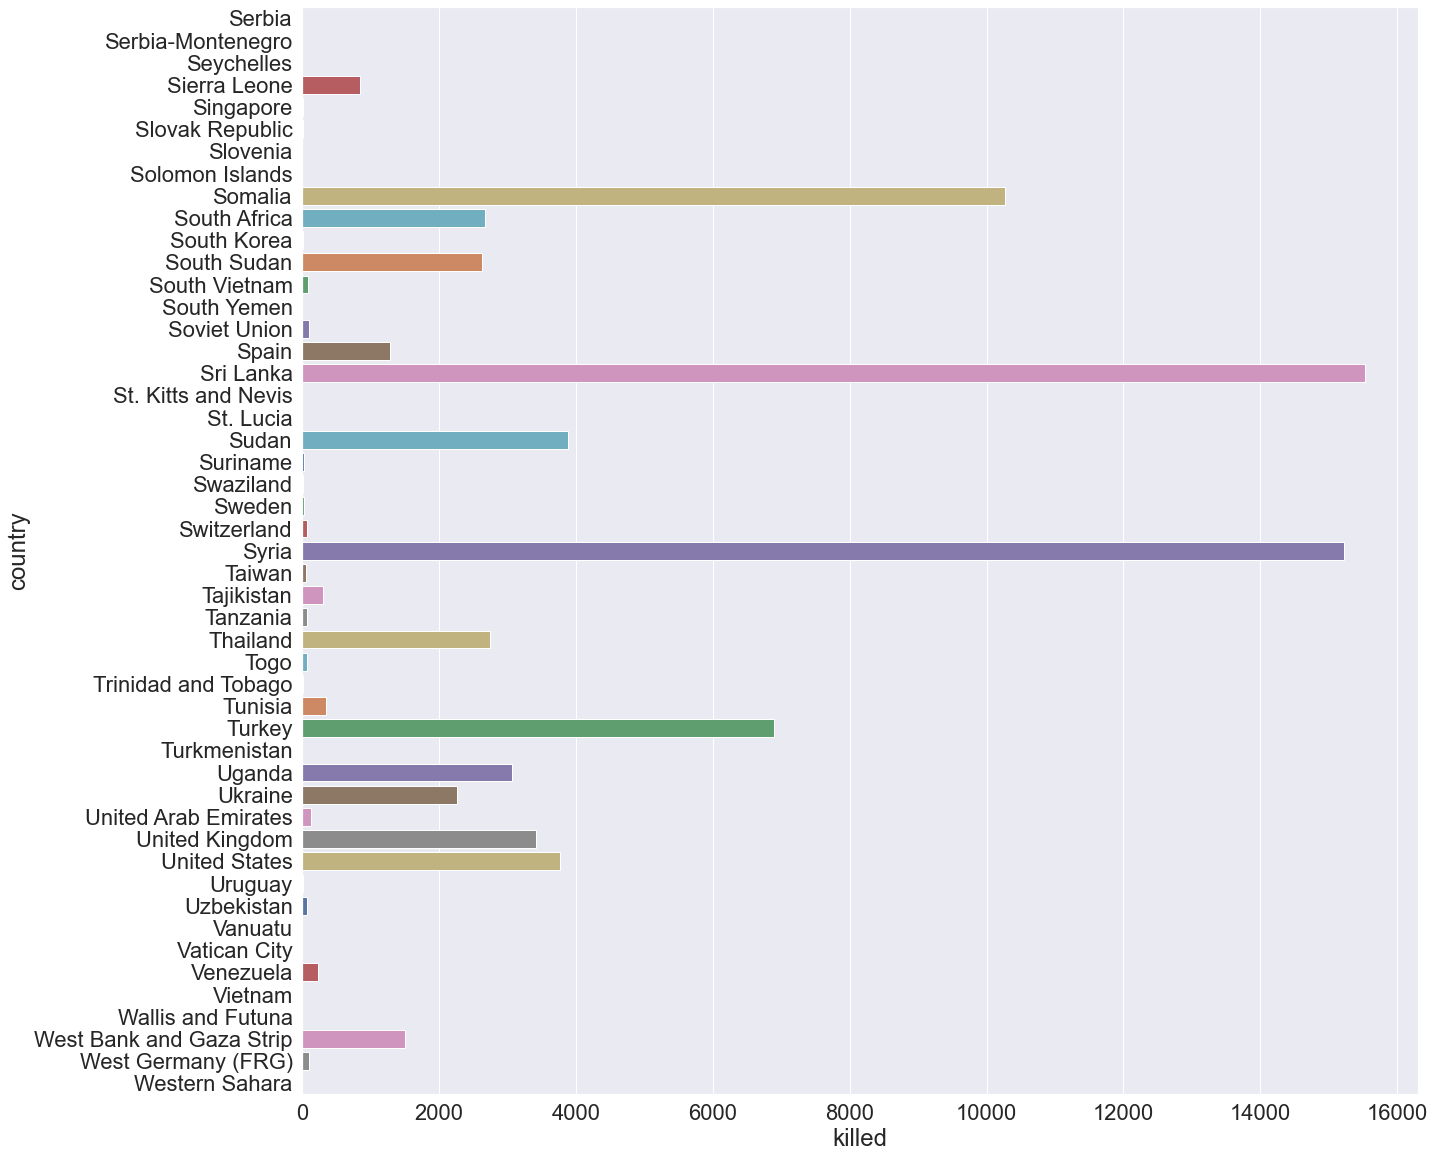

In [27]:
country_names = country_kill_format_data.keys()[151:200]
country_wise_killed_count = country_kill_format_data.iloc[0][151:200]

#print(country_names)

plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
sns.barplot(x = country_wise_killed_count, y = country_names, palette = 'deep')

In [28]:
type_kill_format_data = type_kill_data.pivot_table(columns='attack_type', values='killed', aggfunc='sum')
type_kill_format_data

attack_type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
killed,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


Text(0, 0.5, 'Type of Attack')

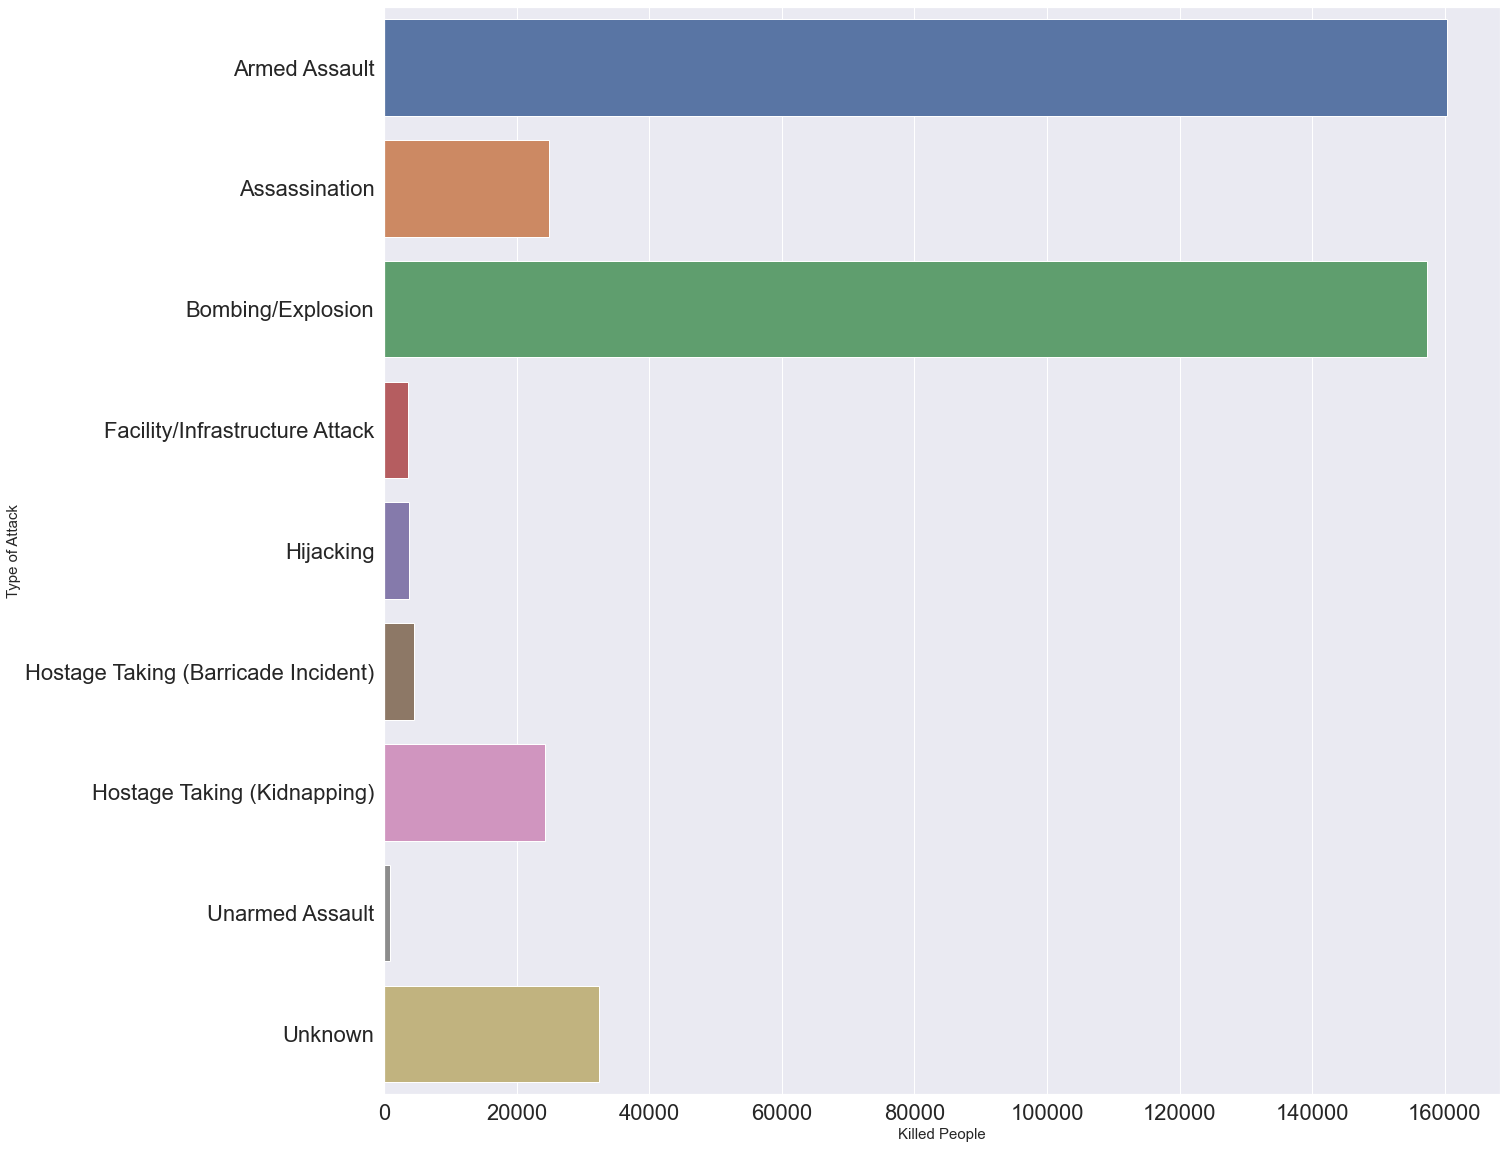

In [29]:
attack_type_names = type_kill_format_data.keys()[:20]
attack_type_killed_count = type_kill_format_data.iloc[0][:20]

plt.figure(figsize=(20,20))
sns.set(font_scale = 2)
sns.barplot(x = attack_type_killed_count, y = attack_type_names, palette = 'deep')
plt.xlabel('Killed People', fontsize=15)
plt.ylabel('Type of Attack', fontsize=15)

In [30]:
"""Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. 
The Middle East and North Africa are seen to be the places of serious terrorist attacks. 
In addition, even though there is a perception that Muslims are supporters of terrorism, 
Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, 
it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries"""

'Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. \nThe Middle East and North Africa are seen to be the places of serious terrorist attacks. \nIn addition, even though there is a perception that Muslims are supporters of terrorism, \nMuslims are the people who are most damaged by terrorist attacks. If you look at the graphics, \nit appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries'